<a href="https://colab.research.google.com/github/pauarmentaa/Mapas-de-calor-y-boxplots/blob/main/Antiguedad_Saldos_Mapas_Boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargar librerías 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargar el archivo a utilizar 
saldos = pd.read_excel("saldos.xlsx")

## Análisis descriptivo: Todas las facturas

In [ ]:
saldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   No. CLIENTE        164 non-null    object        
 1   NOMBRE             164 non-null    object        
 2   FACTURA            164 non-null    object        
 3   FECHA_FACTURA      164 non-null    datetime64[ns]
 4   FECHA_VENCIMIENTO  164 non-null    datetime64[ns]
 5   MONTO ADEUDADO     164 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 7.8+ KB


In [ ]:
saldos.head(3)

,No. CLIENTE,NOMBRE,FACTURA,FECHA_FACTURA,FECHA_VENCIMIENTO,MONTO ADEUDADO
0,6401,DONGA HWASUNG MEXICO,F40238,2023-02-24,2023-03-26,97485.94
1,6401,DONGA HWASUNG MEXICO,F40353,2023-03-14,2023-04-13,97485.94
2,4598,PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO,F40352,2023-03-14,2023-04-13,64916.21


In [ ]:
# Exploramos la existencia de nulos 
saldos.isna().sum()

No. CLIENTE          0
NOMBRE               0
FACTURA              0
FECHA_FACTURA        0
FECHA_VENCIMIENTO    0
MONTO ADEUDADO       0
dtype: int64

<Axes: xlabel='MONTO ADEUDADO'>

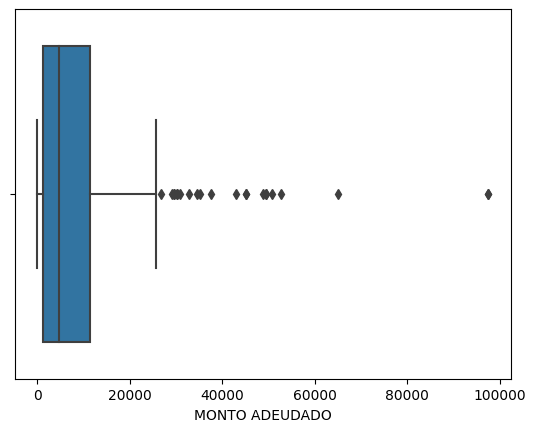

In [ ]:
# Daiagramas de caja 
sns.boxplot(x="MONTO ADEUDADO",data=saldos)

In [ ]:
saldos["MONTO ADEUDADO"].describe()

count      164.000000
mean     10847.433598
std      16203.646456
min         19.940000
25%       1198.047500
50%       4680.600000
75%      11314.915000
max      97485.940000
Name: MONTO ADEUDADO, dtype: float64

### Así se distribuye el monto de facturas adeudadas, podemos observar que la mediana de las facturas es de 4,680. El 75% de las facturas se agrupan por debajo de los 11,314 pesos. También es posible notar que el mínimo de este monto es de 19.94 y el máximo de 97,485

In [ ]:
saldos.describe()

,MONTO ADEUDADO
count,164.000000
mean,10847.433598
std,16203.646456
min,19.940000
25%,1198.047500
50%,4680.600000
75%,11314.915000
max,97485.940000


## Análisis descriptivo: Facturas pendientes de pago

In [ ]:
# Suponiendo que hoy es 2023-03-01 y quieres las facturas que aún no se han vencido
# Se considera la fecha de envío de documento como punto de análisis
saldos_filtrado = saldos.loc[saldos['FECHA_VENCIMIENTO'] > '2023-03-17']
saldos_filtrado

,No. CLIENTE,NOMBRE,FACTURA,FECHA_FACTURA,FECHA_VENCIMIENTO,MONTO ADEUDADO
0,6401,DONGA HWASUNG MEXICO,F40238,2023-02-24,2023-03-26,97485.94
1,6401,DONGA HWASUNG MEXICO,F40353,2023-03-14,2023-04-13,97485.94
2,4598,PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO,F40352,2023-03-14,2023-04-13,64916.21
3,3930,INDUSTRIAS LANCERMEX,F40217,2023-02-23,2023-03-25,52715.74
4,4712,HELVEX,F40173,2023-02-17,2023-04-03,50639.80
...,...,...,...,...,...,...
110,42,ELASTOMEROS DE QUERETARO,F40343,2023-03-13,2023-04-12,1827.00
119,3916,VINILOS,F40378,2023-03-16,2023-03-31,1390.72
132,1284,TERMOFORMADOS,F40349,2023-03-14,2023-04-13,799.24
150,161,LBQ FOUNDRY,F40161,2023-02-16,2023-03-18,366.04


<Axes: xlabel='MONTO ADEUDADO'>

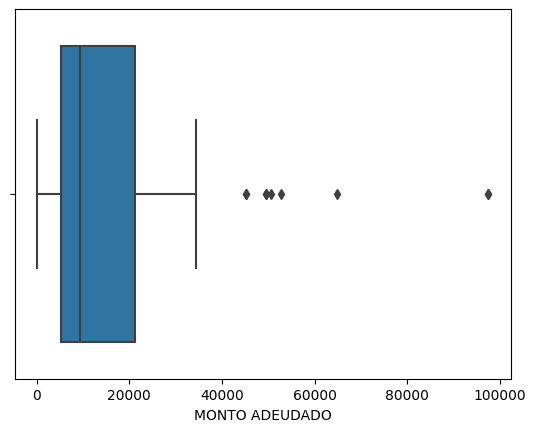

In [ ]:
# Daiagramas de caja 
sns.boxplot(x="MONTO ADEUDADO",data=saldos_filtrado)

In [ ]:
saldos_filtrado.describe()

,No. CLIENTE,MONTO ADEUDADO
count,65.000000,65.000000
mean,2923.830769,17506.677077
std,2411.696444,20853.403089
min,42.000000,191.040000
25%,644.000000,5373.100000
50%,2768.000000,9396.000000
75%,4598.000000,21179.280000
max,8503.000000,97485.940000


### Así se distribuye el monto de facturas adeudadas pendientes de pago, podemos observar que la mediana de las facturas es de 9,396. El 75% de las facturas se agrupan por debajo de los 21,179 pesos. También es posible notar que el mínimo de este monto es de 191.04 y el máximo de 97,485

## ¿Hay alguna variable que no aporta información?
### No, en este caso todas las variables son relevantes: 'No. CLIENTE', 'NOMBRE', 'FACTURA', 'FECHA_FACTURA','FECHA_VENCIMIENTO', 'MONTO ADEUDADO'

## Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
### En este conjunto de datos, no eliminaría ninguna variable. Todas me parecen relevantes para el análisis de la antiguedad de saldos. 

## ¿Existen variables que tengan datos extraños?
### No, todas las variables parecen contener datos que hacen sentido al nombre de la columna. 

In [ ]:
saldos.dtypes

No. CLIENTE                   int64
NOMBRE                       object
FACTURA                      object
FECHA_FACTURA        datetime64[ns]
FECHA_VENCIMIENTO    datetime64[ns]
MONTO ADEUDADO              float64
dtype: object

## Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
### Debido a que sólo se tiene una variable de tipo numérico en este dataset, no es posible responder esa pregunta, ya que existe únicamente un rango.

## ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?


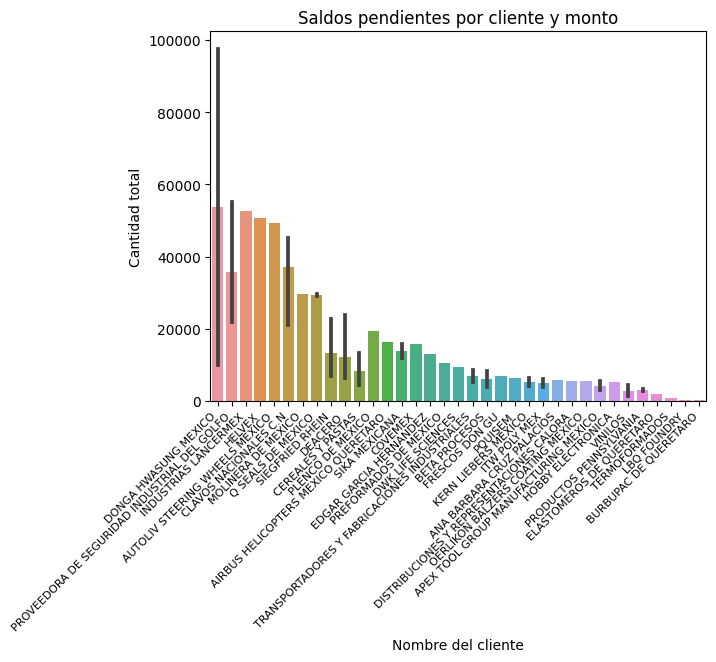

In [ ]:
ax = sns.barplot(data=saldos_filtrado, x='NOMBRE', y='MONTO ADEUDADO')
ax.set(xlabel='Nombre del cliente', ylabel='Cantidad total', title='Saldos pendientes por cliente y monto')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(plt.gca().get_xticklabels(), fontsize=8)
plt.show()